# **Induced Pairing**

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC, FMTI2_Relative_Coordinates, FMTI2_Wigner_Transform

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]


# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=z, Z=z, z0=0, kx=0.001, ky=0.002, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])
print(F2.shape)

(250, 4, 4)


## Check on Antisymmetry

#### **Real Space**

In order to satisy the Pauli principle, the anomalous Green's fucntion must satisfy the following antisymmetry relation:
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; z,z';\omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; z',z;-\omega) \,.
$$

In [2]:
z1 = 18; z2 = 79; kx = -0.0094; ky = 0.058; w = 0.0043

# compute F at given parameters
f = FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=0., kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=w, Gamma=Gamma)
print(f)
print()

# invert all the coordinates
finv = FMTI2_NeumannBC(d=d, z=z2, Z=z1, z0=0., kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=-w, Gamma=Gamma)
print(-np.transpose(finv))
print()

# compute sum
add = np.add( f, np.transpose(finv) ); add[np.abs(add) < 1E-10] = 0
print(add)

[[-4.01353161e-05-4.74718346e-05j -7.67324540e-06-6.02767399e-05j
  -1.43842337e-05+4.43997449e-05j  5.49912614e-05+1.68823003e-05j]
 [ 2.93969544e-05+5.52826783e-05j -3.32746277e-06+5.97138413e-05j
   2.31982993e-05-3.99129580e-05j -5.01301464e-05-2.53740681e-05j]
 [ 5.05994833e-06+5.50752759e-05j -2.61647876e-05+4.54473639e-05j
   3.38568461e-05-2.44338776e-05j -2.81238653e-05-4.02405931e-05j]
 [-5.17532594e-05-2.35191704e-05j -2.85893217e-05-4.33024370e-05j
   4.47691470e-06+4.14210456e-05j  4.72442341e-05-7.89742055e-06j]]

[[-4.01353161e-05-4.74718346e-05j -7.67324540e-06-6.02767399e-05j
  -1.43842337e-05+4.43997449e-05j  5.49912614e-05+1.68823003e-05j]
 [ 2.93969544e-05+5.52826783e-05j -3.32746277e-06+5.97138413e-05j
   2.31982993e-05-3.99129580e-05j -5.01301464e-05-2.53740681e-05j]
 [ 5.05994833e-06+5.50752759e-05j -2.61647876e-05+4.54473639e-05j
   3.38568461e-05-2.44338776e-05j -2.81238653e-05-4.02405931e-05j]
 [-5.17532594e-05-2.35191704e-05j -2.85893217e-05-4.33024370e-05j
 

#### **Relative Coordinates**

In relative coordinates $Z_0 = \frac12 (z+z')$ and $\overline{z} = z - z'$, the same antisymmetry relation takes the following form:
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; Z_0, \overline{z}; \omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; Z_0, -\overline{z}; -\omega) \,.
$$

In [3]:
Z0 = 15; zrel = 36; kx = -0.0041; ky = 0.065; w = 0.0013

# compute F at given parameters
f = FMTI2_Relative_Coordinates(d=d, Z0=Z0, zrel=zrel, z0=0., kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=w, Gamma=Gamma)
print(f)
print()

# invert all the coordinates
finv = FMTI2_Relative_Coordinates(d=d, Z0=Z0, zrel=-zrel, z0=0., kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=-w, Gamma=Gamma)
print(-np.transpose(finv))
print()

# compute sum
add = np.add( f, np.transpose(finv) ); add[np.abs(add) < 1E-10] = 0
print(add)

[[-0.19961991-0.15528705j  0.00871762-0.25083484j -0.11821896+0.18318564j
   0.20809878+0.03288108j]
 [ 0.09097493+0.21913707j -0.12814421+0.20354522j  0.17787859-0.09981852j
  -0.16264936-0.12700512j]
 [ 0.01076681+0.2186543j  -0.16752877+0.14032357j  0.18226259-0.02341495j
  -0.0999446 -0.14860697j]
 [-0.20636957-0.07257341j -0.06506754-0.21572299j -0.03871707+0.17868494j
   0.18666784-0.04117334j]]

[[-0.19961991-0.15528705j  0.00871762-0.25083484j -0.11821896+0.18318564j
   0.20809878+0.03288108j]
 [ 0.09097493+0.21913707j -0.12814421+0.20354522j  0.17787859-0.09981852j
  -0.16264936-0.12700512j]
 [ 0.01076681+0.2186543j  -0.16752877+0.14032357j  0.18226259-0.02341495j
  -0.0999446 -0.14860697j]
 [-0.20636957-0.07257341j -0.06506754-0.21572299j -0.03871707+0.17868494j
   0.18666784-0.04117334j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


## <font color='black'> Wigner Transform </font> 

We switch to relative coordinates 
$$
    Z = \frac12 (z+z') \,, 
    \qquad
    \overline{z} = z-z' \,,
$$
in order to obtain the pairing as a function of center-of-mass $Z$ and relative position $\overline{z}$ of the two electrons forming a Cooper pair.
The opposite transformation from relative coordinates to separate coordinates $z$ and $z'$ is given by
$$
    z = Z+\frac12 \overline{z} \,, 
    \qquad
    z' = Z-\frac12 \overline{z} \,.
$$
Fixed the center of mass coordinate $Z$ of the Cooper pair, we can perform a *discrete Fourier transform* over the relative coordinate as
$$
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z, k) = \sum_{\overline{z}} e^{-i k \overline{z}} 
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z+\frac12 \overline{z}, Z-\frac12 \overline{z}) \,.
$$
In local momentum $k$, the antisymmetry relation of the pairing in the MTI is given by
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; Z_0, k; \omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; Z_0, -k; -\omega) \,.
$$

#### **Local Momentum**

In [4]:
Z0 = 15; k = 0.028; kx = -0.0014; ky = 0.057; w = 0.0021

# compute F at given parameters
f = FMTI2_Wigner_Transform(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=99)
print(f)
print()

# invert all the coordinates
finv = FMTI2_Wigner_Transform(d=d, Z0=Z0, k=-k, kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=-omega, Gamma=Gamma, N=99)
print(-np.transpose(finv))
print()

# compute sum
add = np.add( f, np.transpose(finv) ); add[np.abs(add) < 1E-8] = 0
print(add)

[[-6.30285116-2.12371624j  0.15297604-3.8618501j  -1.5469504 +4.80695951j
   4.94598537+0.54136472j]
 [ 1.73877575+6.51204139j -5.40316955+3.39893531j  5.07828468-1.96728353j
  -3.65606938-5.4052188j ]
 [-2.68729384+4.23514428j -5.05812172-0.33135853j  4.93258722+2.553823j
   0.61287991-3.3859887j ]
 [-4.96099219+2.34351711j -2.11132236-2.54068985j  1.66406417+2.10084568j
   4.30132072-3.70642622j]]

[[-6.30285116-2.12371624j  0.15297604-3.8618501j  -1.54695039+4.80695951j
   4.94598537+0.54136472j]
 [ 1.73877575+6.51204139j -5.40316954+3.39893531j  5.07828468-1.96728353j
  -3.65606938-5.4052188j ]
 [-2.68729384+4.23514428j -5.05812172-0.33135853j  4.93258722+2.553823j
   0.61287991-3.3859887j ]
 [-4.96099219+2.34351711j -2.11132236-2.54068984j  1.66406417+2.10084567j
   4.30132072-3.70642622j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


## Spatial Dependence

#### <font color='green'> **Absolute Value** </font> 

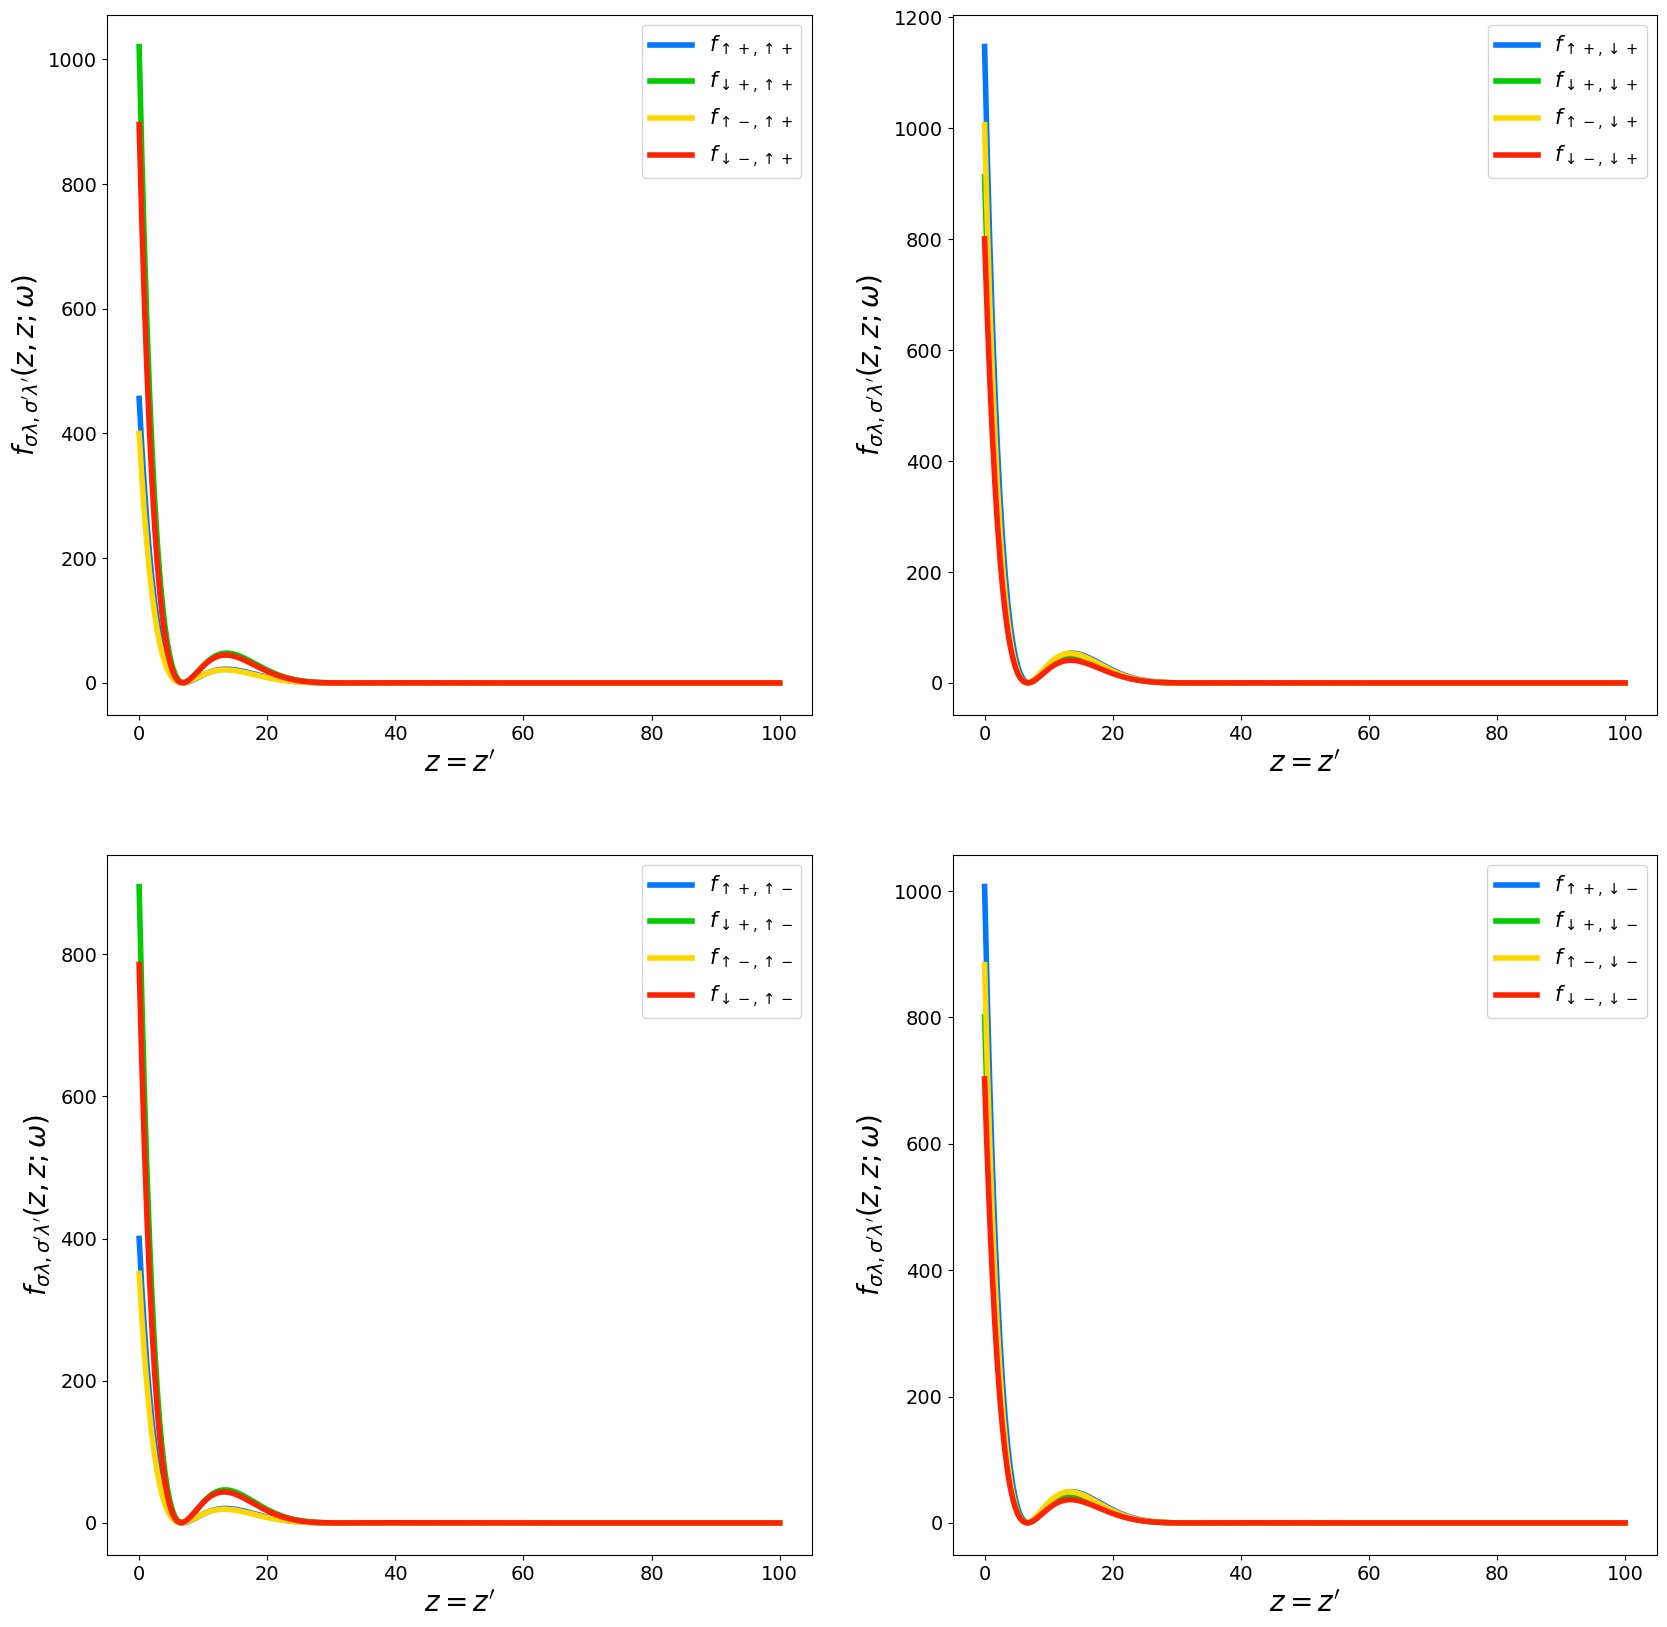

In [5]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

## Frequency Dependence

In [6]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.050; z0=0
# frequency
frequency = np.linspace(-0.0049, 0.0049, 150)
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=5., Z=5., z0=0., kx=0.005, ky=-0.005, L=L, mu=mu, Delta=Delta, omega=f, Gamma=Gamma) for f in frequency])
print(F2.shape)

(150, 4, 4)


#### <font color='green'> **Absolute Value** </font> 

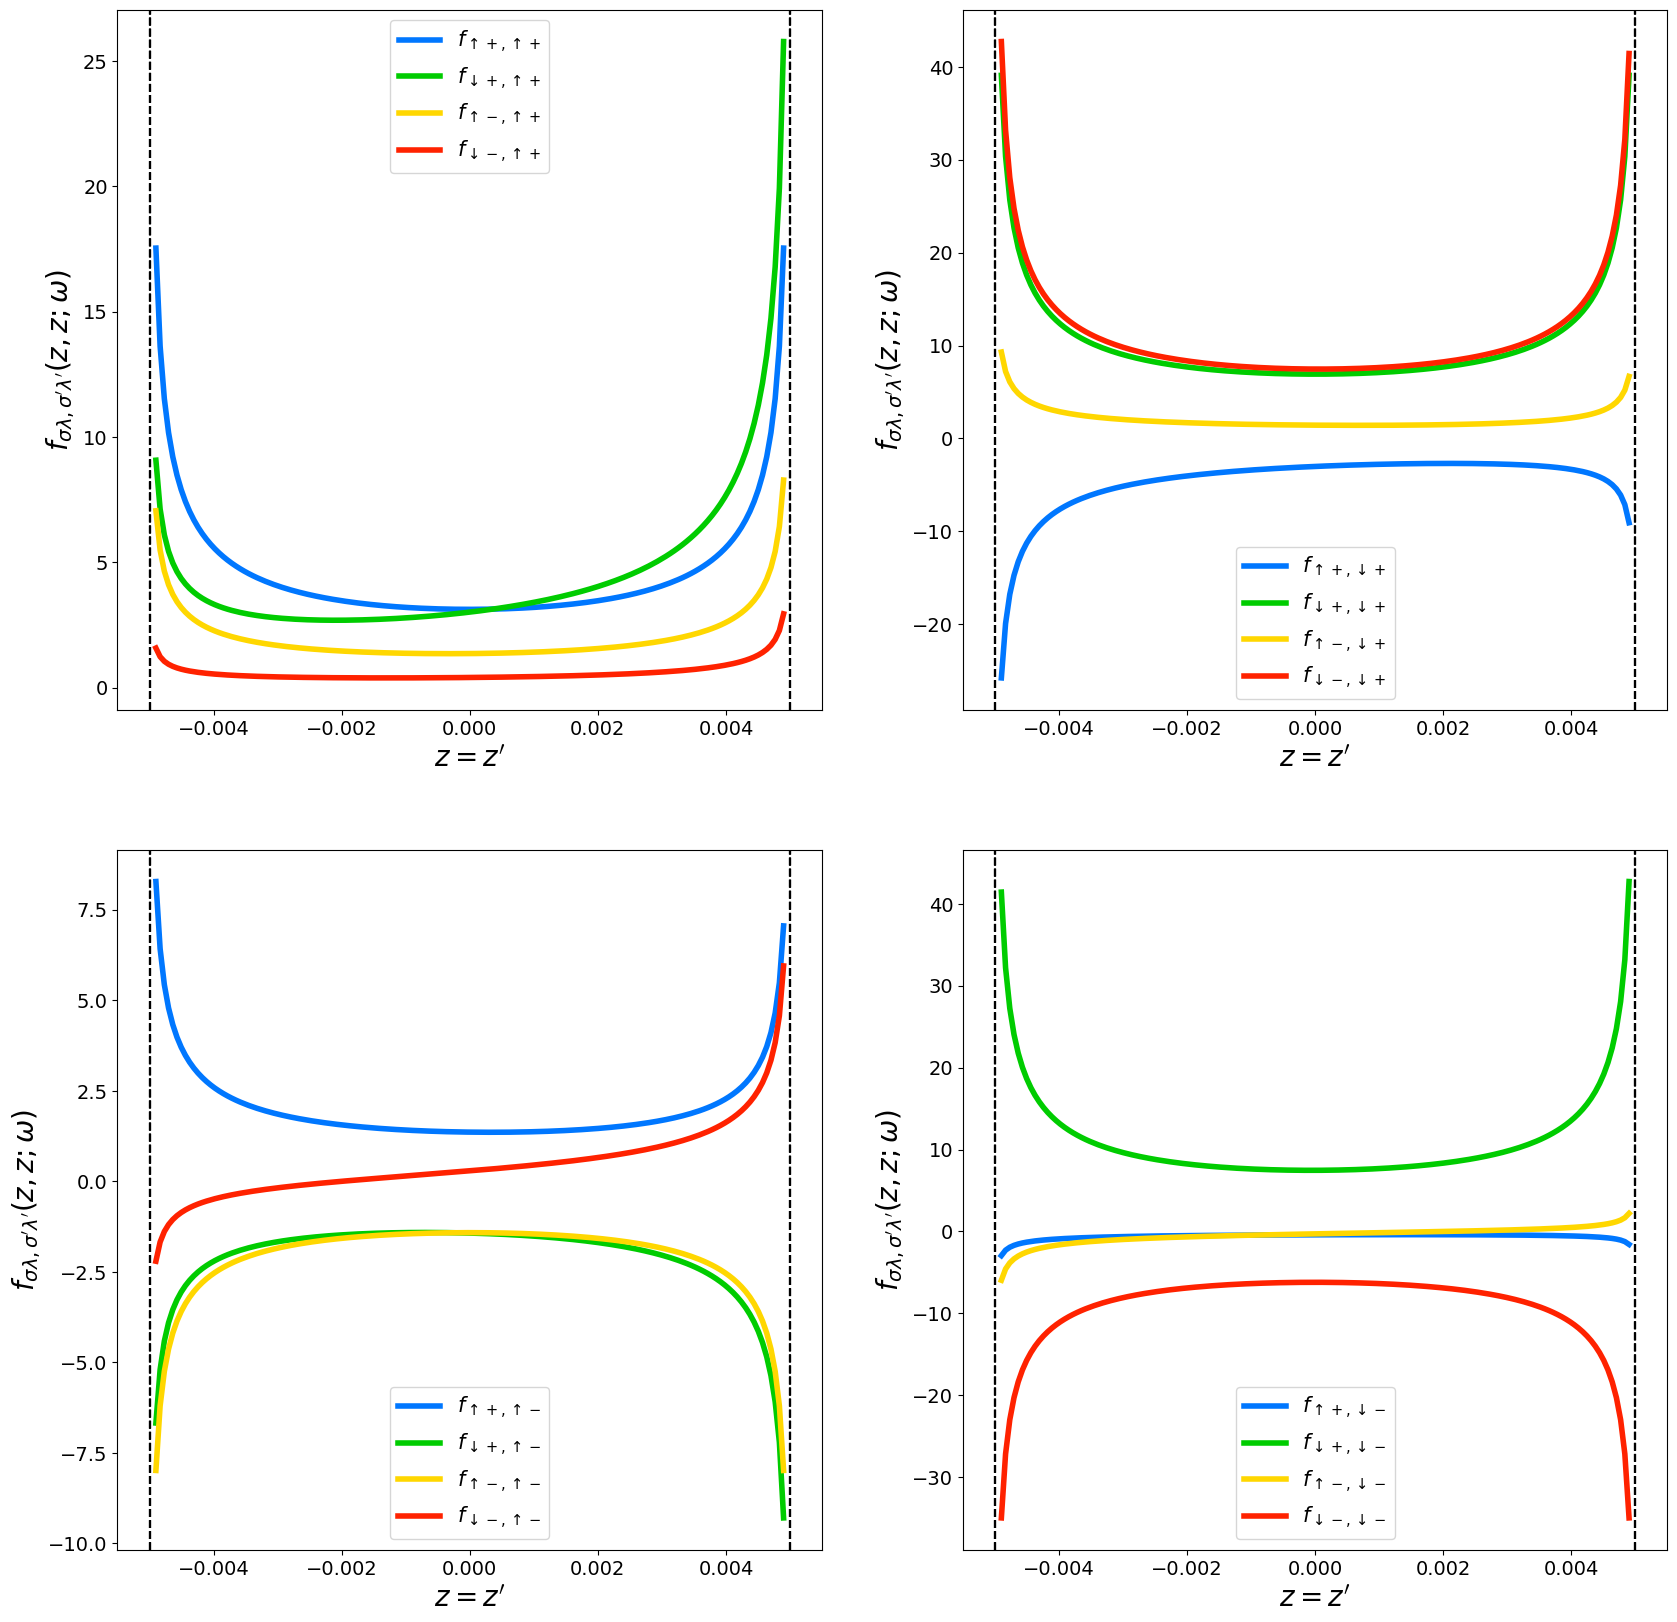

In [7]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        axs[iPic][jPic].axvline(x=Delta, c='black', lw=1.5, ls='--'); axs[iPic][jPic].axvline(x=-Delta, c='black', lw=1.5, ls='--')

        # plot second order correction F2
        axs[iPic][jPic].plot(frequency, F2[:,irow,icol].imag, c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

# **Channel Decomposition** 

We decompose the induced pairing in a basis of 16 matrices that generates the whole space made by the outer product of spin $\sigma = \uparrow, \downarrow$ and orbital $\lambda=\pm$.
The $4 \times 4$ matrix can be decomposed as
$$
    \Delta_{ind} (\mathbf{k},\omega) = \sum_A f_A (\mathbf{k},\omega) \Lambda_A \,,
$$
where the coefficients of the expansion can be computed through
$$
    f_A (\mathbf{k},\omega) = 
    \frac{ \text{Tr}\left( \Lambda_A^\dagger \, \Delta_{ind} (\mathbf{k},\omega)  \right) }
    { \text{Tr}\left( \Lambda_A^\dagger \, \Lambda_A  \right) }
$$and $\{ \Lambda_A \}$ is a basis of 16 matrices that generates the whole space.
We choose the following basis in spin space
$$
    \left\{ S_a \right\} = 
    \left\{ 
    \frac12 (\sigma_0+\sigma_z), \frac12 (\sigma_0-\sigma_z), \frac{1}{\sqrt2} \sigma_x, \frac{i}{\sqrt2} \sigma_y 
    \right\} \,,
$$
where $\sigma_{x,y,z}$ is the usual set of Pauli matrices acting in spin space.
The first three matrices of the basis correspond to symmetric spin triplet channels $f_{\uparrow\uparrow}, f_{\downarrow\downarrow}$ and $\frac{1}{\sqrt2}(f_{\uparrow\downarrow} + f_{\downarrow\uparrow})$, while the last one correspond to the antisymmetric spin-single channel $\frac{1}{\sqrt2}(f_{\uparrow\downarrow} - f_{\downarrow\uparrow})$.
Choosing a similar basis for the orbital part 
$$
    \left\{ L_a \right\} = 
    \left\{ 
    \frac12 (\lambda_0+\lambda_z), \frac12 (\lambda_0-\lambda_z), \frac{1}{\sqrt2} \lambda_x, \frac{i}{\sqrt2} \lambda_y 
    \right\} \,,
$$
the full set of matrices $\{ \Lambda_A \}$ can be obtained as
$$
    \Lambda_A = S_a \otimes L_\alpha \,,
$$
for $a \in \{ \uparrow\uparrow, \downarrow\downarrow, \text{sym}, \text{asym} \}$ and $\alpha \in \{ ++, --, \text{sym}, \text{asym} \}$, where $\text{sym}$ ($\text{asym}$) label the symmetric (antisymmetric) mixed state.




#### <font color='green'> **Projected Components** </font> 

In [8]:
from sympy import Matrix, Symbol
from Pairing_Projection import Render_Projection, Render_Channel, Pairing_Projection, Pairing_Channel

# define your physical basis labels (spin x orbital)
basis = [r"\uparrow+", r"\uparrow-", r"\downarrow+", r"\downarrow-"]

# build a 4×4 Matrix of Symbols f_{α,β}
M = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

# spin and ordital indices
s = '22'; o = 'sym'

# projection 
Render_Projection(M=M, spin=s, orbital=o)

print()

# pairing channel
Render_Channel(spin=s, orbital=o)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### <font color='green'> **Pairing Channels** </font> 

In [9]:
# parameters
Z0 = 5; k = 0.0028; kx = -0.0014; ky = 0.0057; w = 0.0021

# compute F at given parameters
F2_k = FMTI2_Wigner_Transform(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=99)
print(F2_k)
print()

s = 'asym'; o = 'sym'

proj = Pairing_Projection(Delta=F2_k, spin=s, orbital=o) 
print(proj)
print()

c = Pairing_Channel(spin=s, orbital=o)
print(c)

[[ -1532.33165285 +2602.45989634j  -1654.89037722 +2499.24948839j
    2696.26210226 +1493.63374424j  -1860.24860829 -1342.91140179j]
 [  2162.37860314 -3983.69651701j   2749.26684507+13628.23043009j
   -5129.38158479 -2228.05196072j -11555.00547507 +2231.95326638j]
 [  2637.27558899 +1477.67570058j   3540.23496363 +1758.00249028j
    1422.87829326 -2664.57075706j  -1447.36897739 +2784.20151337j]
 [  3133.01383012 +1777.38569922j -11605.80137333 +2273.370606j
    1849.65131961 -4152.26006168j  -1836.36822299 -9829.98293283j]]

(-6831.439493413567-3553.1757760050073j)

[[ 0. +0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  0. +0.j  0.5+0.j  0. +0.j]
 [-0. +0.j -0.5+0.j  0. +0.j  0. +0.j]
 [-0.5+0.j -0. +0.j  0. +0.j  0. +0.j]]


# **Parity Sketch**

Below are some sketch of functions corresponding to $s$-wave, $p$-wave and $d$-wave pairing in both momentum and real spaces.

#### <font color='green'> **Momentum Space** </font> 

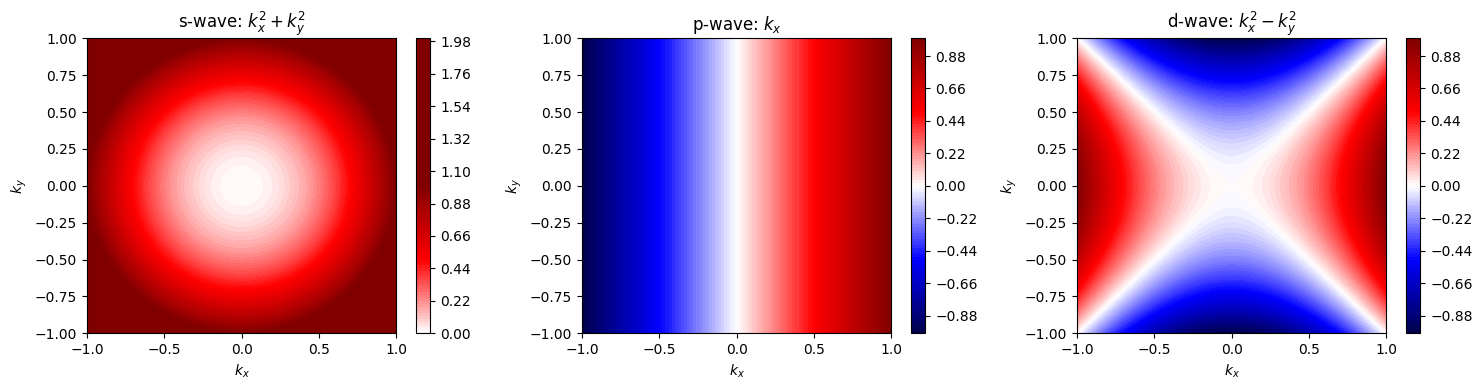

In [10]:
import numpy as np
import matplotlib.pyplot as plt

kx = np.linspace(-1, 1, 100)
ky = np.linspace(-1, 1, 100)
kx, ky = np.meshgrid(kx, ky)

f_s = kx**2 + ky**2
f_p = kx
f_d = kx**2 - ky**2

fig, axes = plt.subplots(1, 3, figsize=(15,4))

titles = ['s-wave: $k_x^2 + k_y^2$', 
          'p-wave: $k_x$', 
          'd-wave: $k_x^2 - k_y^2$']

for ax, f, title in zip(axes, [f_s, f_p, f_d], titles):
    c = ax.contourf(kx, ky, f, levels=100, vmin=-1, vmax=1, cmap='seismic')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_title(title)
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.show()

#### <font color='green'> **Real Space** </font> 

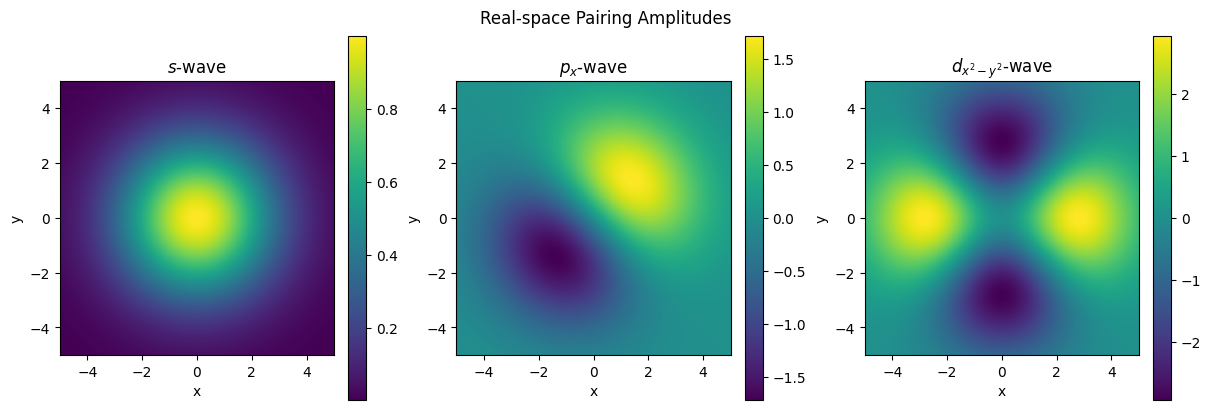

In [11]:
# real‐space grid
L = 5.0          # size in each direction
N = 400          # points per axis
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R2 = X**2 + Y**2

# Gaussian envelope
sigma = 2.0
g = np.exp(-R2/(2*sigma**2))

# real‐space pairing functions
f_s =            g                # s‐wave: isotropic
f_p =  (X + Y) *      g                # p_x‐wave: changes sign under x→−x
f_d = (X**2-Y**2) * g            # d_{x²−y²}‐wave: nodal lines along x=±y

# plot them side‐by‐side
fig, axes = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
for ax, f, title in zip(axes,
                       [f_s, f_p, f_d],
                       ['$s$-wave', '$p_x$-wave', '$d_{x^2−y^2}$-wave']):
    pcm = ax.pcolormesh(X, Y, f, shading='auto')
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlabel('x'); ax.set_ylabel('y')
    fig.colorbar(pcm, ax=ax)

plt.suptitle('Real‐space Pairing Amplitudes')
plt.show()